In [2]:
import os
import re
import pandas as pd
import numpy as np
import urllib.request
import shutil
import xml.etree.ElementTree as ET

#pd.options.mode.chained_assignment = None

To begin, I will read in the most recent, historical year of data available from Capital Bikeshare. This ranges from 2015 Q3 to 2016 Q3. Each file is stored as a separate dataframe so that I can explore each one individually before combining them into one dataframe.

In [30]:
df_2015Q3 = pd.read_csv('data/2015-Q3-cabi-trip-history-data.csv')
df_2015Q4 = pd.read_csv('data/2015-Q4-Trips-History-Data.csv')
df_2016Q1 = pd.read_csv('data/2016-Q1-Trips-History-Data.csv')
df_2016Q2 = pd.read_csv('data/2016-Q2-Trips-History-Data.csv')
df_2016Q3_1 = pd.read_csv('data/2016-Q3-Trips-History-Data-1.csv')
df_2016Q3_2 = pd.read_csv('data/2016-Q3-Trips-History-Data-2.csv')

Below I explore each dataframe so that I can determine whether or not they will combine easily.

In [31]:
df_2015Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056366 entries, 0 to 1056365
Data columns (total 9 columns):
Duration (ms)           1056366 non-null int64
Start date              1056366 non-null object
End date                1056366 non-null object
Start station number    1056366 non-null int64
Start station           1056366 non-null object
End station number      1056366 non-null int64
End station             1056366 non-null object
Bike #                  1056366 non-null object
Member type             1056366 non-null object
dtypes: int64(3), object(6)
memory usage: 72.5+ MB


In [32]:
df_2015Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706004 entries, 0 to 706003
Data columns (total 9 columns):
Duration (ms)           706004 non-null int64
Start date              706004 non-null object
End date                706004 non-null object
Start station number    706004 non-null int64
Start station           706004 non-null object
End station number      706004 non-null int64
End station             706004 non-null object
Bike #                  706004 non-null object
Member type             706004 non-null object
dtypes: int64(3), object(6)
memory usage: 48.5+ MB


In [33]:
df_2016Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552399 entries, 0 to 552398
Data columns (total 9 columns):
Duration (ms)           552399 non-null int64
Start date              552399 non-null object
End date                552399 non-null object
Start station number    552399 non-null int64
Start station           552399 non-null object
End station number      552399 non-null int64
End station             552399 non-null object
Bike number             552399 non-null object
Member Type             552399 non-null object
dtypes: int64(3), object(6)
memory usage: 37.9+ MB


In [34]:
df_2016Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942332 entries, 0 to 942331
Data columns (total 9 columns):
Duration (ms)           942332 non-null int64
Start date              942332 non-null object
End date                942332 non-null object
Start station number    942332 non-null int64
Start station           942332 non-null object
End station number      942332 non-null int64
End station             942332 non-null object
Bike number             942332 non-null object
Account type            942332 non-null object
dtypes: int64(3), object(6)
memory usage: 64.7+ MB


In [35]:
df_2016Q3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723741 entries, 0 to 723740
Data columns (total 9 columns):
Duration (ms)           723741 non-null int64
Start date              723741 non-null object
End date                723741 non-null object
Start station number    723741 non-null int64
Start station           723741 non-null object
End station number      723741 non-null int64
End station             723741 non-null object
Bike number             723741 non-null object
Member Type             723741 non-null object
dtypes: int64(3), object(6)
memory usage: 49.7+ MB


In [36]:
df_2016Q3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344246 entries, 0 to 344245
Data columns (total 9 columns):
Duration (ms)           344246 non-null int64
Start date              344246 non-null object
End date                344246 non-null object
Start station number    344246 non-null int64
Start station           344246 non-null object
End station number      344246 non-null int64
End station             344246 non-null object
Bike number             344246 non-null object
Member Type             344246 non-null object
dtypes: int64(3), object(6)
memory usage: 23.6+ MB


Since all dataframes seem to have similar information and data types, and have been created under the same standards through Capital Bikeshare, I will go ahead and standardize each dataframe's feature names. I will then combine all dataframes into one.

In [176]:
new_feature_names = ['Duration', 'Start_Date', 'End_Date', 'Start_Station_Number', 
                     'Start_Station', 'End_Station_Number', 'End_Station', 'Bike_Number', 'Member_Type']

df_2015Q3.columns = new_feature_names
df_2015Q4.columns = new_feature_names
df_2016Q1.columns = new_feature_names
df_2016Q2.columns = new_feature_names
df_2016Q3_1.columns = new_feature_names
df_2016Q3_2.columns = new_feature_names

bike_data = df_2015Q3.append([df_2015Q4, df_2016Q1, df_2016Q2, df_2016Q3_1, df_2016Q3_2])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325088 entries, 0 to 344245
Data columns (total 9 columns):
Duration                int64
Start_Date              object
End_Date                object
Start_Station_Number    int64
Start_Station           object
End_Station_Number      int64
End_Station             object
Bike_Number             object
Member_Type             object
dtypes: int64(3), object(6)
memory usage: 330.0+ MB


In [177]:
# Explore the first several rows of the new dataframe
bike_data.head()

,Duration,Start_Date,End_Date,Start_Station_Number,Start_Station,End_Station_Number,End_Station,Bike_Number,Member_Type
0,257866,7/1/2015 0:00,7/1/2015 0:04,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W21516,Registered
1,2683934,7/1/2015 0:00,7/1/2015 0:45,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W00476,Casual
2,2349547,7/1/2015 0:02,7/1/2015 0:41,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W20384,Casual
3,826571,7/1/2015 0:02,7/1/2015 0:16,31229,New Hampshire Ave & T St NW,31602,Park Rd & Holmead Pl NW,W00972,Registered
4,123046,7/1/2015 0:04,7/1/2015 0:06,31610,Eastern Market / 7th & North Carolina Ave SE,31269,3rd St & Pennsylvania Ave SE,W21565,Registered


Next, I will add coordinate data that relates to each start and end station so that I can then calculate a distance feature. The coordinate data comes from Capital Bikeshare's XML live feed, which I access and then parse.

In [110]:
# The code in this cell is from the page [https://kwkelly.com/blog/analyzing-capital-bikeshare-data-with-python-and-pandas/]

# Access the XML feed and download to a file
def get_station_xml():
    url = "https://www.capitalbikeshare.com/data/stations/bikeStations.xml"
    download_dir = 'xml_data'
    if not os.path.exists(download_dir):
        os.mkdir(download_dir)
    file_name = os.path.join(download_dir, 'bike_stations.xml')
    with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
get_station_xml()

# Parse the XML file and return a dataframe object
def xml_to_pandas(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    l = []
    for station in root:
        d = {}
        for attrib in station:
            d[str(attrib.tag)] = str(attrib.text)
        l.append(d)

    df = pd.DataFrame.from_dict(l)
    return df 
bike_stations = xml_to_pandas('xml_data/bike_stations.xml')

 
# Wrangle the resulting dataframe object and display
bike_stations['terminalName'] = bike_stations['terminalName'].astype(int)
bike_stations['lat'] = bike_stations['lat'].astype(float)
bike_stations['long'] = bike_stations['long'].astype(float)
station_locations = bike_stations[['terminalName']]
station_locations['location'] = list(zip(bike_stations['lat'], bike_stations['long']))
station_locations['Station_Capacity'] = (bike_stations['nbBikes'].astype(int) 
                                         + bike_stations['nbEmptyDocks'].astype(int))
station_locations.head()

,terminalName,location,Station_Capacity
0,31000,"(38.858971, -77.05323)",15
1,31001,"(38.85725, -77.05332)",11
2,31002,"(38.856425, -77.049232)",16
3,31003,"(38.86017, -77.049593)",11
4,31004,"(38.857866, -77.05949)",11


In [178]:
# Combine original dataframe with new station lat/long data using a left join on End Station and then Start Station
station_locations.columns = ['End_Station_Number', 'End_Location', 'End_Station_Capacity']
bike_data = pd.merge(bike_data, station_locations, how='left', on='End_Station_Number')

station_locations.columns = ['Start_Station_Number', 'Start_Location', 'Start_Station_Capacity']
bike_data = pd.merge(bike_data, station_locations, how='left', on='Start_Station_Number')

# Display the first several rows of the new dataframe
bike_data.head()

,Duration,Start_Date,End_Date,Start_Station_Number,Start_Station,End_Station_Number,End_Station,Bike_Number,Member_Type,End_Location,End_Station_Capacity,Start_Location,Start_Station_Capacity
0,257866,7/1/2015 0:00,7/1/2015 0:04,31116,California St & Florida Ave NW,31117,15th & Euclid St NW,W21516,Registered,"(38.92333, -77.0352)",15.0,"(38.917761, -77.04062)",19.0
1,2683934,7/1/2015 0:00,7/1/2015 0:45,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W00476,Casual,"(38.888553, -77.032429)",22.0,"(38.888553, -77.032429)",22.0
2,2349547,7/1/2015 0:02,7/1/2015 0:41,31247,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W20384,Casual,"(38.888553, -77.032429)",22.0,"(38.888553, -77.032429)",22.0
3,826571,7/1/2015 0:02,7/1/2015 0:16,31229,New Hampshire Ave & T St NW,31602,Park Rd & Holmead Pl NW,W00972,Registered,"(38.9308, -77.0315)",19.0,"(38.91554, -77.03818)",22.0
4,123046,7/1/2015 0:04,7/1/2015 0:06,31610,Eastern Market / 7th & North Carolina Ave SE,31269,3rd St & Pennsylvania Ave SE,W21565,Registered,"(38.887378, -77.001955)",15.0,"(38.886952, -76.996806)",14.0


In [112]:
# Determine whether there are any missing values
print('Missing values:')
for feature in bike_data.columns:
    print(feature + ':', bike_data[feature].isnull().values.ravel().sum())

Missing values:
Duration: 0
Start_Date: 0
End_Date: 0
Start_Station_Number: 0
Start_Station: 0
End_Station_Number: 0
End_Station: 0
Bike_Number: 0
Member_Type: 0
End_Location: 76
End_Station_Capacity: 76
Start_Location: 87
Start_Station_Capacity: 87


Seeing as the newly formed features, Start_Location, End_Location, Start_Station_Capacity, and End_Station_Capacity contain missing values I need to determine which stations are missing coordinates, and why this might be the case.

In [148]:
# Print out unique station numbers to check which stations do not have associated locations or capacities  
start_subset_test = bike_data[bike_data['Start_Location'].isnull()]
print('Start Stations without locations:', start_subset_test['Start_Station_Number'].unique())
start_subset_test = bike_data[bike_data['Start_Station_Capacity'].isnull()]
print('Start Stations without capacities:', start_subset_test['Start_Station_Number'].unique())

end_subset_test = bike_data[bike_data['End_Location'].isnull()]
print('End Stations without locations:', end_subset_test['End_Station_Number'].unique())
end_subset_test = bike_data[bike_data['End_Station_Capacity'].isnull()]
print('End Stations without capacities:', end_subset_test['End_Station_Number'].unique())

Start Stations without locations: [31709]
Start Stations without capacities: [31709]
End Stations without locations: [31709]
End Stations without capacities: [31709]


It is now more clear that station 31709 is the only station that is missing coordinate and capacity data as found using the live XML feed. Doing some research has shown me that it is possible that this station is no longer in service because it is probably an old station that was phased out. I was able to find the coordinates of (38.884085, -76.957461) and capacity of 11 (https://gist.github.com/since1968/e51c0f3d95e67bf49f74). The live XML feed was not able to give me this data because it is a point in time feed whereas the data I am using is from 2015 Q3 - 2016 Q3. I will now add these values to the dataframe.

In [149]:
location_31709 = '(38.884085, -76.957461)'
capacity_31709 = 11
bike_data.loc[bike_data['Start_Station_Number'] == 31709, 'Start_Location'] = location_31709
bike_data.loc[bike_data['Start_Station_Number'] == 31709, 'Start_Station_Capacity'] = capacity_31709
bike_data.loc[bike_data['End_Station_Number'] == 31709, 'End_Location'] = location_31709
bike_data.loc[bike_data['End_Station_Number'] == 31709, 'End_Station_Capacity'] = capacity_31709

# Are the missing values gone?
print('Missing Start Station Location:', bike_data['Start_Location'].isnull().values.ravel().sum())
print('Missing Start Station Capacity:', bike_data['Start_Station_Capacity'].isnull().values.ravel().sum())
print('Missing End Station Location:', bike_data['End_Location'].isnull().values.ravel().sum())
print('Missing End Station Capacity:', bike_data['End_Station_Capacity'].isnull().values.ravel().sum())

Missing Start Station Location: 0
Missing Start Station Capacity: 0
Missing End Station Location: 0
Missing End Station Capacity: 0


In [150]:
# Determine how many different values each feature can take
print('Number of unique values:')
for feature in bike_data.columns:
    print(feature + ':', len(list(bike_data[feature].unique())))

Number of unique values:
Duration: 1828278
Start_Date: 521665
End_Date: 521874
Start_Station_Number: 407
Start_Station: 415
End_Station_Number: 407
End_Station: 415
Bike_Number: 4364
Member_Type: 2
End_Location: 407
End_Station_Capacity: 28
Start_Location: 407
Start_Station_Capacity: 28


As we can see above, some features have an appropriate number of values while others do not. Duration, Start_Date, End_Date, and Member_Type are as expected. Per Capital Bikeshare's website, there are over 3,700 bikes available at over 440 stations. Given this information, the number of unique Bike_Number's may be too high, but this could be a function of changing bike numbers over the course of the year. For this reason, and because it is a unique identifier that is not predictive, I may drop this variable later on. Lastly, it is odd that Start_Station_Number, Start_Location, End_Station_Number, and End_Location have 407 values while Start_Station and End_Station have 415 values. Since I would have expected these features to match, I will explore and clean further below.

In [151]:
# Split the original data into a dataframe that shows only the start station information
start_df = pd.DataFrame(bike_data['Start_Station'].value_counts())
start_df.reset_index(drop=False, inplace=True)
start_df.columns = ['Start_Station', 'Counts']
start_df = start_df.merge(bike_data[['Start_Location', 'Start_Station_Number', 'Start_Station']], how='left', on='Start_Station')
start_df.drop_duplicates(inplace=True)
start_df['Start_Location_Lat'] = start_df['Start_Location'].map(lambda x: str(x).split(', ')[0].lstrip('('))
start_df['Start_Location_Long'] = start_df['Start_Location'].map(lambda x: str(x).split(', ')[1].rstrip(')'))
start_df.drop('Start_Location', axis=1, inplace=True)
start_df = start_df.sort_values(by='Start_Station_Number')
start_df.reset_index(drop=True, inplace=True)

start_df.head()

,Start_Station,Counts,Start_Station_Number,Start_Location_Lat,Start_Location_Long
0,20th & Bell St,1371,31000,38.858970999999997,-77.053229999999999
1,Eads St & 15th St S,1298,31000,38.858970999999997,-77.053229999999999
2,18th & Eads St.,3370,31001,38.857250000000001,-77.053319999999999
3,20th & Crystal Dr,7792,31002,38.856425000000002,-77.049232000000003
4,15th & Crystal Dr,7359,31003,38.860169999999997,-77.049593000000002


In [152]:
# Split the original data into a dataframe that shows only the end station information
end_df = pd.DataFrame(bike_data['End_Station'].value_counts())
end_df.reset_index(drop=False, inplace=True)
end_df.columns = ['End_Station', 'Counts']
end_df = end_df.merge(bike_data[['End_Location', 'End_Station_Number', 'End_Station']], how='left', on='End_Station')
end_df.drop_duplicates(inplace=True)
end_df['End_Location_Lat'] = end_df['End_Location'].map(lambda x: str(x).split(', ')[0].lstrip('('))
end_df['End_Location_Long'] = end_df['End_Location'].map(lambda x: str(x).split(', ')[1].rstrip(')'))
end_df.drop('End_Location', axis=1, inplace=True)
end_df = end_df.sort_values(by='End_Station_Number')
end_df.reset_index(drop=True, inplace=True)

end_df.head()

,End_Station,Counts,End_Station_Number,End_Location_Lat,End_Location_Long
0,Eads St & 15th St S,1352,31000,38.858970999999997,-77.053229999999999
1,20th & Bell St,837,31000,38.858970999999997,-77.053229999999999
2,18th & Eads St.,3205,31001,38.857250000000001,-77.053319999999999
3,20th & Crystal Dr,8797,31002,38.856425000000002,-77.049232000000003
4,15th & Crystal Dr,7495,31003,38.860169999999997,-77.049593000000002


In [153]:
# Print out descriptive stats to check if the same problems persist
print('Unique Start Station Lat/Long:', len(list(bike_data['Start_Location'].unique())))
print('Unique Start Station Numbers:', len(list(start_df['Start_Station_Number'].unique())))
print('Unique Start Stations:', len(list(start_df['Start_Station'].unique())))
print('Unique End Station Lat/Long:', len(list(bike_data['End_Location'].unique())))
print('Unique End Station Numbers:', len(list(end_df['End_Station_Number'].unique())))
print('Unique End Stations:', len(list(end_df['End_Station'].unique())))

Unique Start Station Lat/Long: 407
Unique Start Station Numbers: 407
Unique Start Stations: 415
Unique End Station Lat/Long: 407
Unique End Station Numbers: 407
Unique End Stations: 415


In [154]:
# Determine where exactly there are issues in the start dataframe
for row in start_df.itertuples():
    try:
        if start_df.get_value(row[0], 'Start_Station_Number') == start_df.get_value(row[0]-1, 'Start_Station_Number'):
            print('Start_Station_Number:', start_df.get_value(row[0]-1, 'Start_Station_Number'), 
                  '\nStart_Station Name:', start_df.get_value(row[0]-1, 'Start_Station'), 
                  '\nName Count:', start_df.get_value(row[0]-1, 'Counts'),
                  'Lat:', start_df.get_value(row[0]-1, 'Start_Location_Lat'),
                  'Long:', start_df.get_value(row[0]-1, 'Start_Location_Long'))
            print('Start_Station_Number:', start_df.get_value(row[0], 'Start_Station_Number'), 
                  '\nStart_Station Name:', start_df.get_value(row[0], 'Start_Station'), 
                  '\nName Count:', start_df.get_value(row[0], 'Counts'),
                  'Lat:', start_df.get_value(row[0], 'Start_Location_Lat'),
                  'Long:', start_df.get_value(row[0], 'Start_Location_Long'), end='\n\n')
    except:
        pass

Start_Station_Number: 31000 
Start_Station Name: 20th & Bell St 
Name Count: 1371 Lat: 38.858970999999997 Long: -77.053229999999999
Start_Station_Number: 31000 
Start_Station Name: Eads St & 15th St S 
Name Count: 1298 Lat: 38.858970999999997 Long: -77.053229999999999

Start_Station_Number: 31030 
Start_Station Name: N Adams St & Lee Hwy 
Name Count: 1648 Lat: 38.89593 Long: -77.089005999999998
Start_Station_Number: 31030 
Start_Station Name: Lee Hwy & N Adams St 
Name Count: 4621 Lat: 38.89593 Long: -77.089005999999998

Start_Station_Number: 31039 
Start_Station Name: Wilson Blvd & N Quincy St 
Name Count: 1527 Lat: 38.880012000000001 Long: -77.107854000000003
Start_Station_Number: 31039 
Start_Station Name: N Quincy St & Wilson Blvd 
Name Count: 4791 Lat: 38.880012000000001 Long: -77.107854000000003

Start_Station_Number: 31048 
Start_Station Name: King St Metro 
Name Count: 2134 Lat: 38.805767000000003 Long: -77.060720000000003
Start_Station_Number: 31048 
Start_Station Name: King S

In [155]:
# Determine where exactly there are issues in the end dataframe
for row in end_df.itertuples():
    try:
        if end_df.get_value(row[0], 'End_Station_Number') == end_df.get_value(row[0]-1, 'End_Station_Number'):
            print('End_Station_Number:', end_df.get_value(row[0]-1, 'End_Station_Number'), 
                  '\nEnd_Station Name:', end_df.get_value(row[0]-1, 'End_Station'), 
                  '\nName Count:', end_df.get_value(row[0]-1, 'Counts'),
                  'Lat:', end_df.get_value(row[0]-1, 'End_Location_Lat'),
                  'Long:', end_df.get_value(row[0]-1, 'End_Location_Long'))
            print('End_Station_Number:', end_df.get_value(row[0], 'End_Station_Number'), 
                  '\nEnd_Station Name:', end_df.get_value(row[0], 'End_Station'), 
                  '\nName Count:', end_df.get_value(row[0], 'Counts'),
                  'Lat:', end_df.get_value(row[0], 'End_Location_Lat'),
                  'Long:', end_df.get_value(row[0], 'End_Location_Long'), end='\n\n')
    except:
        pass

End_Station_Number: 31000 
End_Station Name: Eads St & 15th St S 
Name Count: 1352 Lat: 38.858970999999997 Long: -77.053229999999999
End_Station_Number: 31000 
End_Station Name: 20th & Bell St 
Name Count: 837 Lat: 38.858970999999997 Long: -77.053229999999999

End_Station_Number: 31030 
End_Station Name: Lee Hwy & N Adams St 
Name Count: 2741 Lat: 38.89593 Long: -77.089005999999998
End_Station_Number: 31030 
End_Station Name: N Adams St & Lee Hwy 
Name Count: 1215 Lat: 38.89593 Long: -77.089005999999998

End_Station_Number: 31039 
End_Station Name: N Quincy St & Wilson Blvd 
Name Count: 4315 Lat: 38.880012000000001 Long: -77.107854000000003
End_Station_Number: 31039 
End_Station Name: Wilson Blvd & N Quincy St 
Name Count: 1363 Lat: 38.880012000000001 Long: -77.107854000000003

End_Station_Number: 31048 
End_Station Name: King St Metro 
Name Count: 1746 Lat: 38.805767000000003 Long: -77.060720000000003
End_Station_Number: 31048 
End_Station Name: King St Metro South 
Name Count: 3186 L

It is clear that, when taking into account both start and end station numbers, the same station numbers and lat/long pairs appear to be repeated. Each station number and lat/long pair above is related to two (in one case three) different station names. Further, the station name counts are not repeated, which indicates that the station numbers are not duplicated, but the station names have been changing over time. For this reason, and because this is a unique identifier that is not predictive, I will drop the Start_Station and End_Station features from the data set.

In [179]:
bike_data.drop(['Start_Station', 'End_Station'], 
                axis=1, inplace=True)

bike_data.head()

,Duration,Start_Date,End_Date,Start_Station_Number,End_Station_Number,Bike_Number,Member_Type,End_Location,End_Station_Capacity,Start_Location,Start_Station_Capacity
0,257866,7/1/2015 0:00,7/1/2015 0:04,31116,31117,W21516,Registered,"(38.92333, -77.0352)",15.0,"(38.917761, -77.04062)",19.0
1,2683934,7/1/2015 0:00,7/1/2015 0:45,31247,31247,W00476,Casual,"(38.888553, -77.032429)",22.0,"(38.888553, -77.032429)",22.0
2,2349547,7/1/2015 0:02,7/1/2015 0:41,31247,31247,W20384,Casual,"(38.888553, -77.032429)",22.0,"(38.888553, -77.032429)",22.0
3,826571,7/1/2015 0:02,7/1/2015 0:16,31229,31602,W00972,Registered,"(38.9308, -77.0315)",19.0,"(38.91554, -77.03818)",22.0
4,123046,7/1/2015 0:04,7/1/2015 0:06,31610,31269,W21565,Registered,"(38.887378, -77.001955)",15.0,"(38.886952, -76.996806)",14.0


To help visualize the popularity of certain stations and trips between all stations, I have further wrangled the data off to the side. The resulting visualizations that can be found here:  
• Starting Station Popularity Bubble Map:   https://public.tableau.com/profile/dpalbrecht#!/vizhome/CapitalBikeshareStartingStationPopularityBubbleMap2015Q3-2016Q3/Sheet2  
• Total Trip Popularity Spider Map:  
https://public.tableau.com/profile/dpalbrecht#!/vizhome/CapitalBikeshareTotalTripPopularitySpiderMap2015Q3-2016Q3/Sheet1

Next I will create my target variables: The number of bikes at a station and the number of empty docks at a station at any given point in time. The data I have been wrangling above, in bike_data, is historical trip data, so it is only half of what is needed to back out bikes and spaces at each station. I will bring in the second half of the needed data from CaBi Tracker, which shows the points in time that any station starts an empty cycle, ends an empty cycle, starts a full cycle, and ends a full cycle. Merging these two data sets together should allow me to determine the flow of bikes between stations. 

I will start by reading in the CaBi Tracker data.

In [24]:
# Read in CaBi Tracker data
outage_07012015_08312015 = pd.read_csv('outage/status_07012015_08312015.csv')
outage_09012015_10312015 = pd.read_csv('outage/status_09012015_10312015.csv')
outage_11012015_12312015 = pd.read_csv('outage/status_11012015_12312015.csv')
outage_01012016_03312016 = pd.read_csv('outage/status_01012016_03312016.csv')
outage_04012016_05312016 = pd.read_csv('outage/status_04012016_05312016.csv')
outage_06012016_07312016 = pd.read_csv('outage/status_06012016_07312016.csv')
outage_08012016_09302016 = pd.read_csv('outage/status_08012016_09302016.csv')

# Merge the dataframes together
outage_data = outage_07012015_08312015.append([outage_09012015_10312015, outage_11012015_12312015, 
                                               outage_01012016_03312016, outage_04012016_05312016,
                                               outage_06012016_07312016, outage_08012016_09302016])

# Display outage data summary
outage_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426603 entries, 0 to 71491
Data columns (total 6 columns):
Terminal Number    426603 non-null int64
Station Name       426603 non-null object
Status             426603 non-null object
Start              426603 non-null object
End                426603 non-null object
Duration           426603 non-null int64
dtypes: int64(2), object(4)
memory usage: 22.8+ MB


In [25]:
# Rename column names
outage_data.columns = ['Station_Number', 'Station_Name',
                      'Status', 'Start', 'End', 'Duration']
outage_data['Start'] = pd.to_datetime(outage_data['Start'], infer_datetime_format=True)
outage_data['End'] = pd.to_datetime(outage_data['End'], infer_datetime_format=True)

# Display the first 5 rows of outage data
outage_data.head()

,Station_Number,Station_Name,Status,Start,End,Duration
0,31631,8th & F St NE,full,2015-08-31 21:02:13,2015-08-31 23:59:34,177
1,31252,21st St & Pennsylvania Ave NW,empty,2015-08-31 21:45:48,2015-08-31 23:58:34,133
2,31247,Jefferson Dr & 14th St SW,empty,2015-08-31 23:55:31,2015-08-31 23:56:32,1
3,31119,14th & Belmont St NW,full,2015-08-31 21:56:58,2015-08-31 23:54:31,118
4,31221,18th & M St NW,empty,2015-08-31 22:19:15,2015-08-31 23:53:30,94


To begin, I will test matching the data sets on a subset of the data where station number is 31116.

In [180]:
discrete_bike_data = pd.DataFrame()

# Find total number of bikes (4364)
total_bikes = len(list(bike_data['Bike_Number'].unique()))

# Take out unecessary features from bike_data and prepare to split
bike_data.drop(['Duration', 'Bike_Number', 'Member_Type', 'Start_Location', 
                'End_Location'], axis=1, inplace=True)
bike_data['Status'] = np.nan
bike_data['Start_Date'] = pd.to_datetime(bike_data['Start_Date'], infer_datetime_format=True)
bike_data['End_Date'] = pd.to_datetime(bike_data['End_Date'], infer_datetime_format=True)

bike_data.head()

,Start_Date,End_Date,Start_Station_Number,End_Station_Number,End_Station_Capacity,Start_Station_Capacity,Status
0,2015-07-01 00:00:00,2015-07-01 00:04:00,31116,31117,15.0,19.0,NaN
1,2015-07-01 00:00:00,2015-07-01 00:45:00,31247,31247,22.0,22.0,NaN
2,2015-07-01 00:02:00,2015-07-01 00:41:00,31247,31247,22.0,22.0,NaN
3,2015-07-01 00:02:00,2015-07-01 00:16:00,31229,31602,19.0,22.0,NaN
4,2015-07-01 00:04:00,2015-07-01 00:06:00,31610,31269,15.0,14.0,NaN


In [246]:
###########################################
### CAUTION: TAKES 20-30 MINUTES TO RUN ###
###########################################

for station in list(bike_data['Start_Station_Number'].unique()): 
    
    # Select subsets of the bike_data and outage_data dataframes
    bike_data_subset = bike_data[(bike_data['Start_Station_Number'] == station) | (bike_data['End_Station_Number'] == station)]
    outage_data_subset = outage_data[outage_data['Station_Number'] == station]
    
    # Split bike_data_subset into a start station dataframe that matches 31116
    # The resulting dataframe only includes a 'start date' and an action to subtract a bike
    bike_data_subset_start = bike_data_subset[bike_data_subset['Start_Station_Number'] == station]
    bike_data_subset_start.drop(['End_Date', 'Start_Station_Number', 
                                 'End_Station_Number', 'End_Station_Capacity'], axis=1, inplace=True)
    bike_data_subset_start['Status'] = 'subtract bike'
    bike_data_subset_start.set_index('Start_Date', drop=False, inplace=True)

    # Split bike_data_subset into a end station dataframe that matches 31116
    # The resulting dataframe only includes a 'start date' and an action to add a bike
    bike_data_subset_end = bike_data_subset[bike_data_subset['End_Station_Number'] == station]
    bike_data_subset_end.drop(['Start_Date', 'Start_Station_Number', 
                               'End_Station_Number', 'Start_Station_Capacity'], axis=1, inplace=True)
    bike_data_subset_end.columns = ['Start_Date', 'Start_Station_Capacity', 'Status']
    bike_data_subset_end['Status'] = 'add bike'
    bike_data_subset_end.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when an empty notification starts
    outage_data_subset_empty_start = outage_data_subset.drop(['End', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_empty_start = outage_data_subset_empty_start[outage_data_subset_empty_start['Status'] == 'empty']
    outage_data_subset_empty_start['Status'] = 'start empty'
    outage_data_subset_empty_start.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_empty_start.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when an empty notification ends
    outage_data_subset_empty_end = outage_data_subset.drop(['Start', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_empty_end = outage_data_subset_empty_end[outage_data_subset_empty_end['Status'] == 'empty']
    outage_data_subset_empty_end['Status'] = 'end empty'
    outage_data_subset_empty_end.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_empty_end.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when a full notification starts
    outage_data_subset_full_start = outage_data_subset.drop(['End', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_full_start = outage_data_subset_full_start[outage_data_subset_full_start['Status'] == 'full']
    outage_data_subset_full_start['Status'] = 'start full'
    outage_data_subset_full_start.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_full_start.set_index('Start_Date', drop=False, inplace=True)

    # Split outage_data_31116 for when a full notification ends
    outage_data_subset_full_end = outage_data_subset.drop(['Start', 'Station_Name', 'Duration'], axis=1)
    outage_data_subset_full_end = outage_data_subset_full_end[outage_data_subset_full_end['Status'] == 'full']
    outage_data_subset_full_end['Status'] = 'end full'
    outage_data_subset_full_end.columns = ['Station_Number', 'Status', 'Start_Date']
    outage_data_subset_full_end.set_index('Start_Date', drop=False, inplace=True)

    # Combine the discretized dataframes
    combined_subset = bike_data_subset_start.append([bike_data_subset_end, 
                                                     outage_data_subset_empty_start, 
                                                     outage_data_subset_empty_end, 
                                                     outage_data_subset_full_start, 
                                                     outage_data_subset_full_end])

    # Prepare the combined dataframe for iteration
    combined_subset['Bike_Count'] = np.nan
    combined_subset.columns = ['Date', 'Start_Station_Capacity', 'Station_Number', 'Status', 'Bike_Count']
    combined_subset.sort_values(by='Date', ascending=True, inplace=True)
    combined_subset.reset_index(drop=True, inplace=True)

    # Iterate over the rows in combined_subset and fill in Bike_Count   ### SOMETHING  WRONG WITH THIS LOOP
    cut_first_empty = 1
    for row in combined_subset.itertuples():

        if row[4] == 'end empty' or row[4] == 'start full' or row[4] == 'end full':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count'))
            except:
                combined_subset.set_value(row[0], 'Bike_Count', 0)

        elif row[4] == 'start empty':
            combined_subset.set_value(row[0], 'Bike_Count', 0) 

            # Cut off any of the first rows up until there is a 'start empty' Status
            if cut_first_empty == 1:
                combined_subset.drop(combined_subset.index[:row[0]], inplace=True)
                cut_first_empty -= 1

        elif row[4] == 'add bike':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count')+1)
            except:
                pass

        elif row[4] == 'subtract bike':
            try:
                combined_subset.set_value(row[0], 'Bike_Count', 
                                          combined_subset.get_value(row[0]-1, 'Bike_Count')-1)
            except:
                pass

    # Find the capacity of the station
    #capacity_subset = bike_data[bike_data['Start_Station_Number'] == station].iloc[0].loc['Start_Station_Capacity']

    # Filter out status notifications from outage data
    combined_subset = combined_subset[pd.isnull(combined_subset['Station_Number'])]

    # Add a new target feature, Count_Percent_Population
    combined_subset['Count_Percent_Population'] = combined_subset['Bike_Count'].map(lambda x: (x/total_bikes)*100)

    # Add new target feature, Count_Percent_Capacity
    combined_subset['Count_Percent_Capacity'] = (combined_subset['Bike_Count']/combined_subset['Start_Station_Capacity'])*100

    # Fill in the Station_Number feature and display
    combined_subset['Station_Number'] = str(station)

    discrete_bike_data = discrete_bike_data.append(combined_subset)

In [247]:
discrete_bike_data

,Date,Start_Station_Capacity,Station_Number,Status,Bike_Count,Count_Percent_Population,Count_Percent_Capacity
24,2015-07-01 08:25:00,19.0,31116,add bike,1.0,0.022915,5.263158
26,2015-07-01 08:26:00,19.0,31116,subtract bike,0.0,0.000000,0.000000
28,2015-07-01 09:42:00,19.0,31116,add bike,1.0,0.022915,5.263158
30,2015-07-01 09:55:00,19.0,31116,subtract bike,0.0,0.000000,0.000000
32,2015-07-01 10:38:00,19.0,31116,add bike,1.0,0.022915,5.263158
34,2015-07-01 11:11:00,19.0,31116,subtract bike,0.0,0.000000,0.000000
37,2015-07-01 14:16:00,19.0,31116,add bike,1.0,0.022915,5.263158
38,2015-07-01 14:32:00,19.0,31116,add bike,2.0,0.045830,10.526316
39,2015-07-01 14:49:00,19.0,31116,add bike,3.0,0.068744,15.789474
40,2015-07-01 15:00:00,19.0,31116,add bike,4.0,0.091659,21.052632


In [ ]:
discrete_bike_data.info()

In [317]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import pylab as pl
import datetime
from dateutil.relativedelta import relativedelta

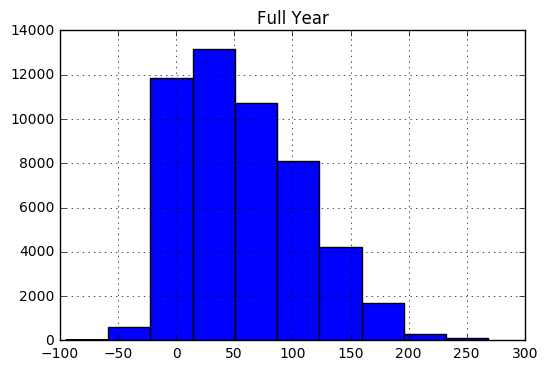

In [297]:
# Isolate station 31116
discrete_bike_data_31116 = discrete_bike_data[discrete_bike_data['Station_Number'] == '31116']

# Look at its distribution
pd.DataFrame.hist(discrete_bike_data_31116, column='Count_Percent_Capacity')
pl.title('Full Year')

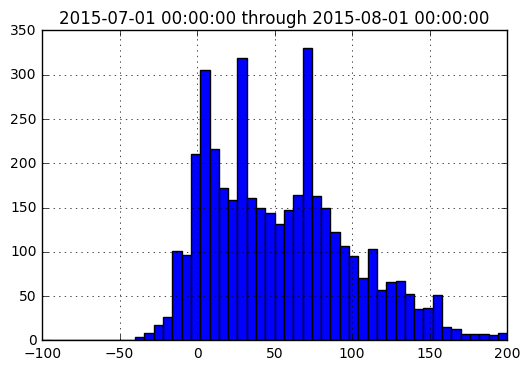

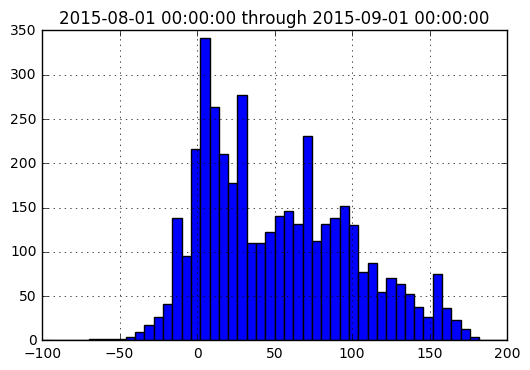

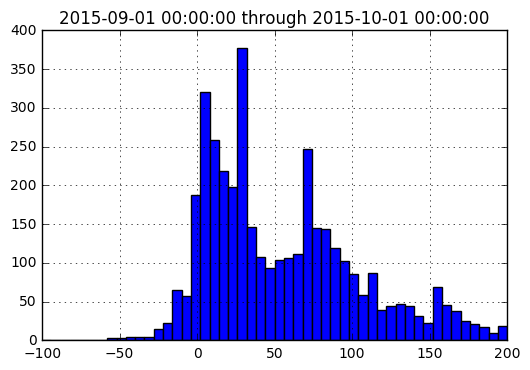

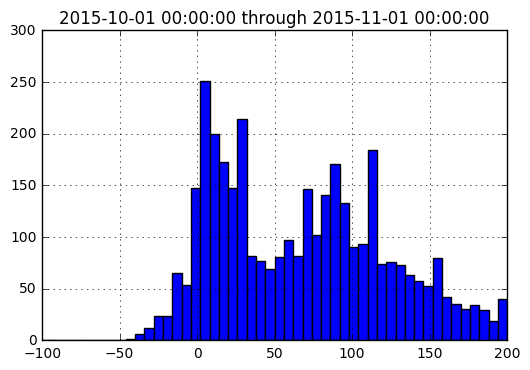

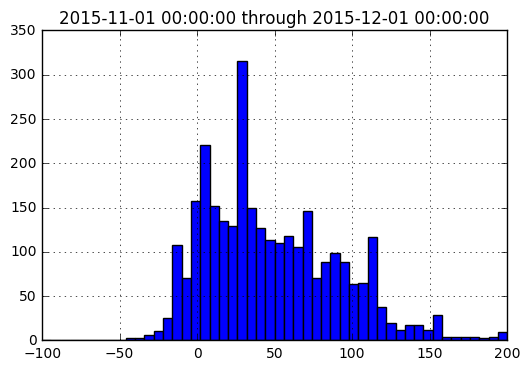

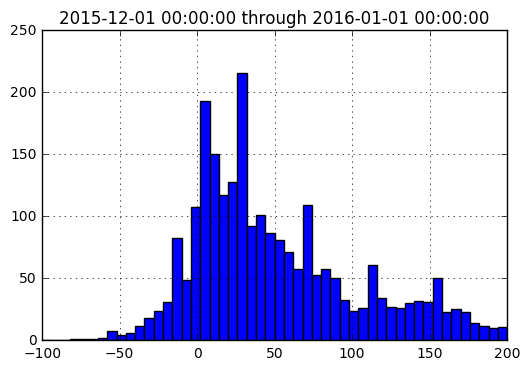

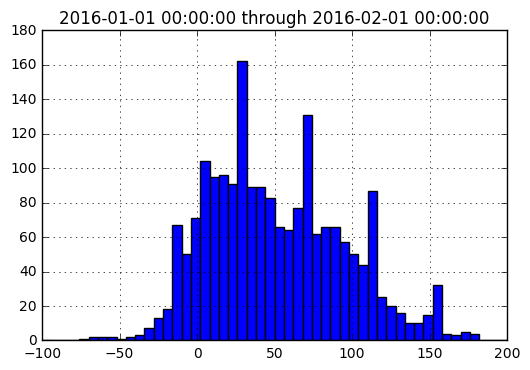

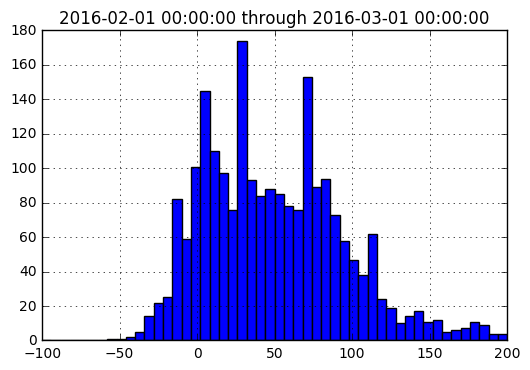

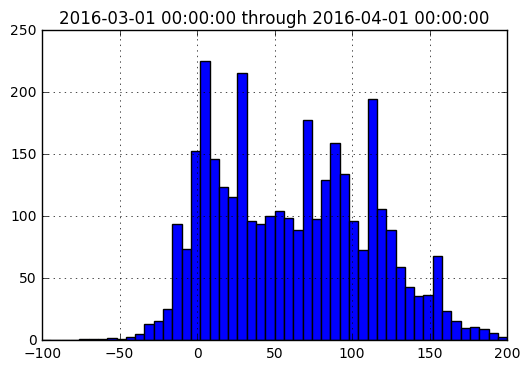

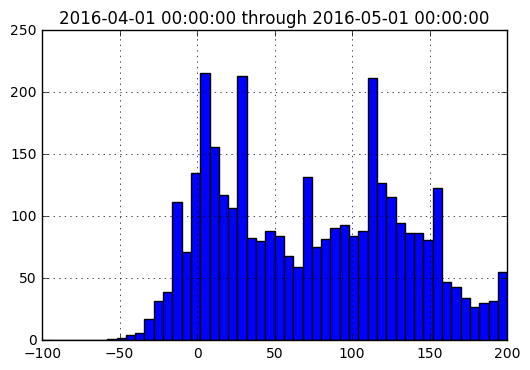

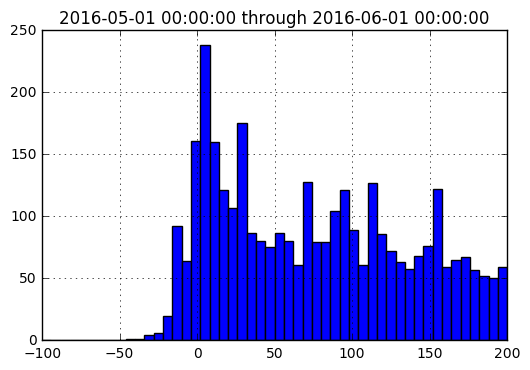

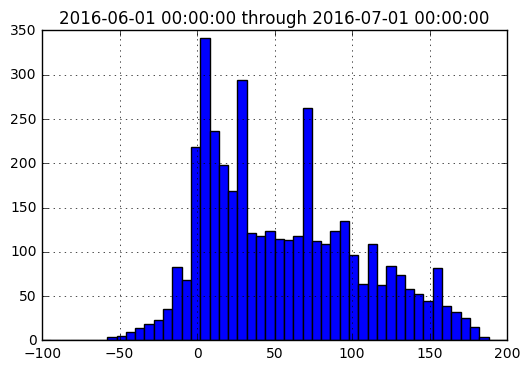

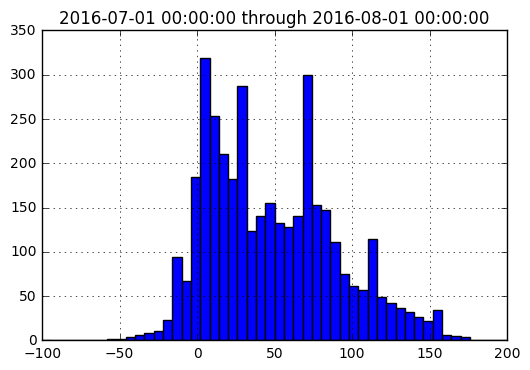

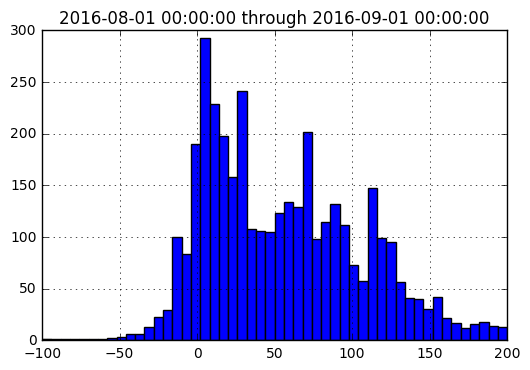

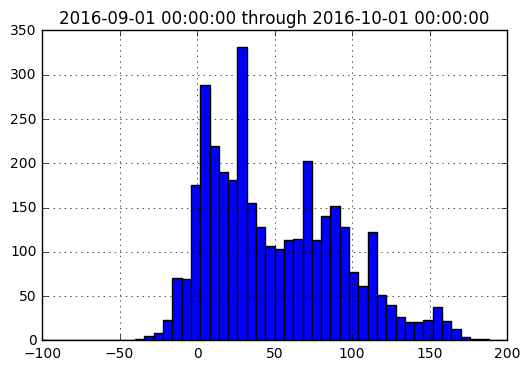

In [323]:
# Look at distributions each month
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-08-01 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_month = relativedelta(months=1)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_month
    end += add_month

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


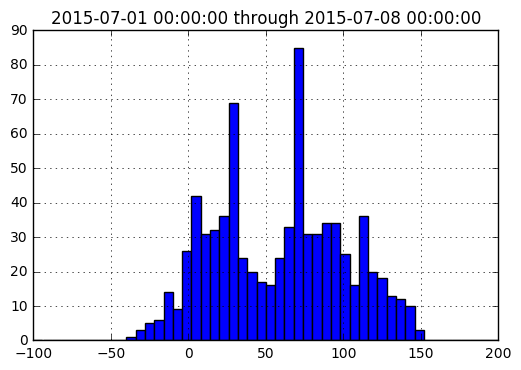

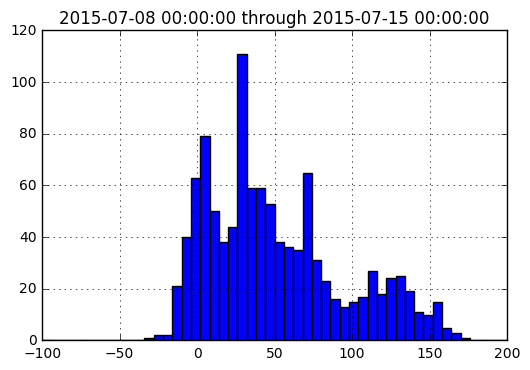

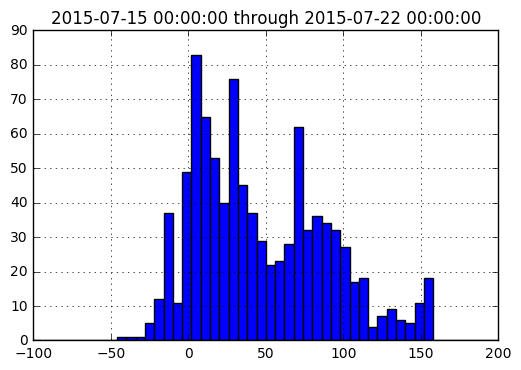

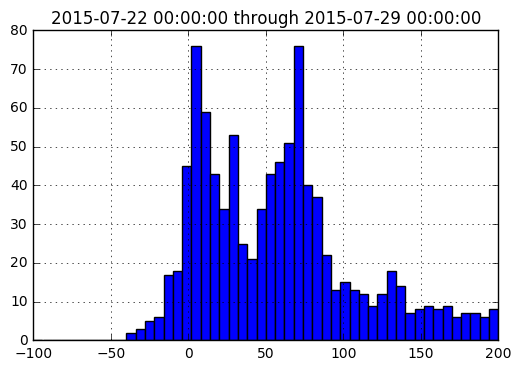

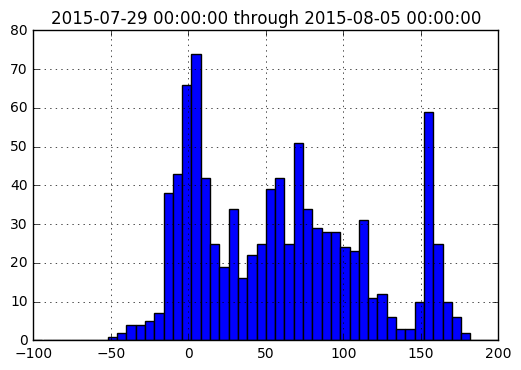

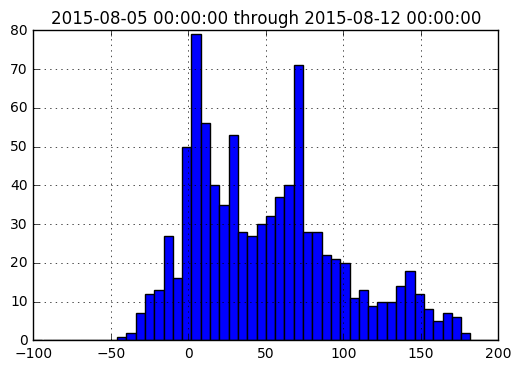

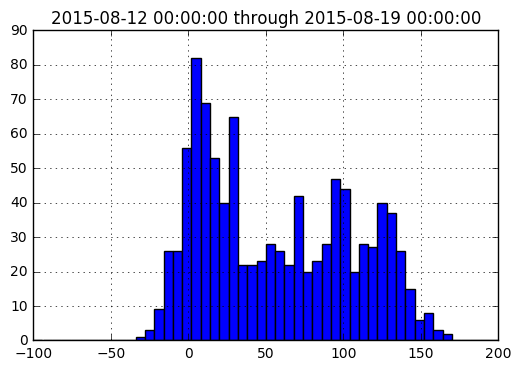

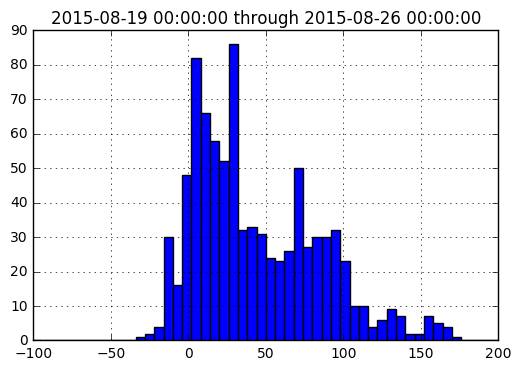

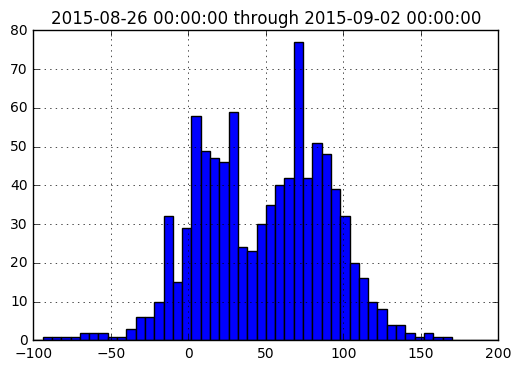

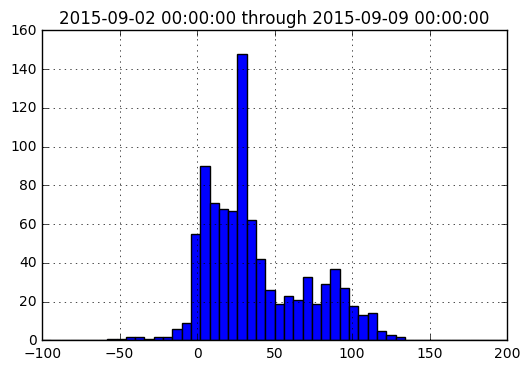

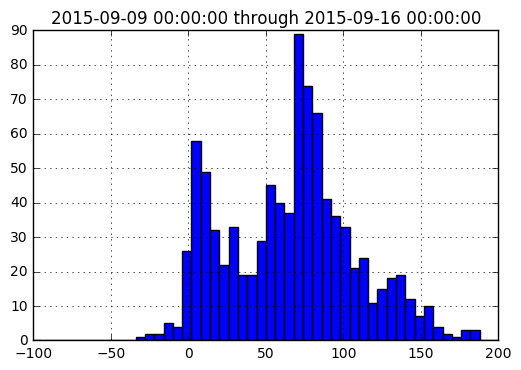

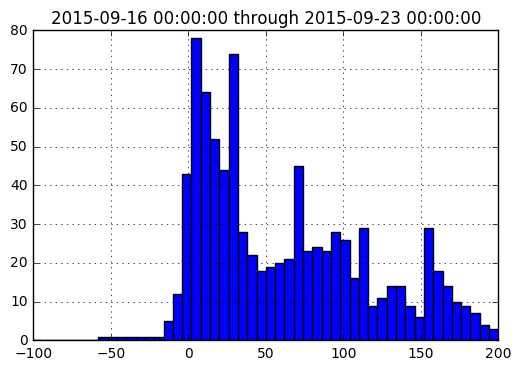

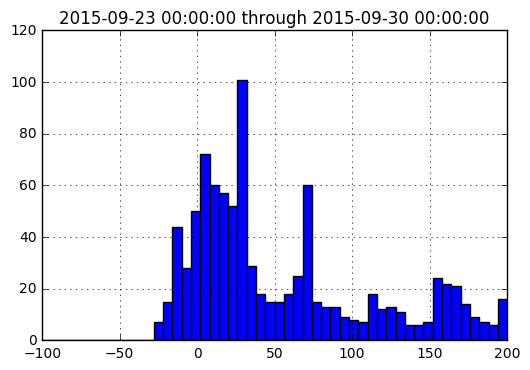

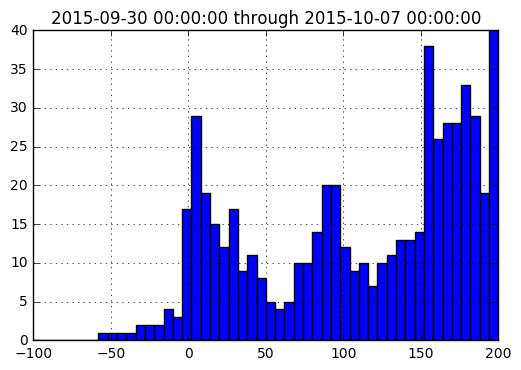

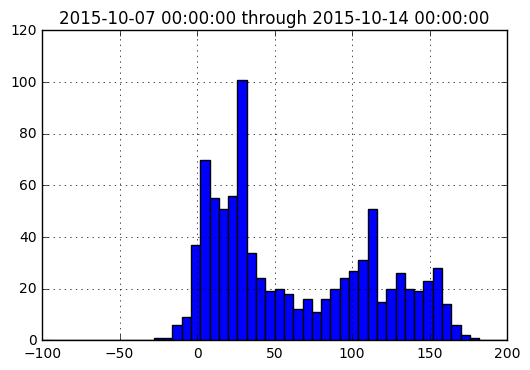

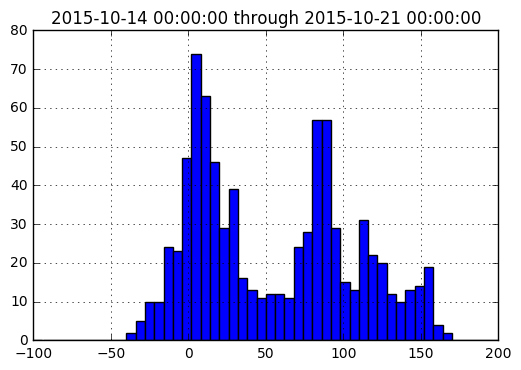

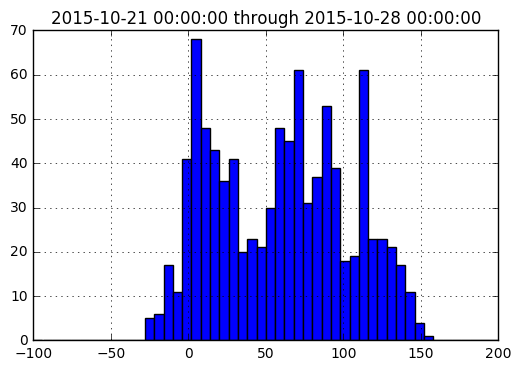

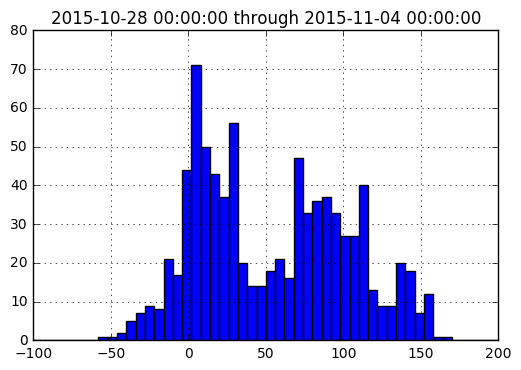

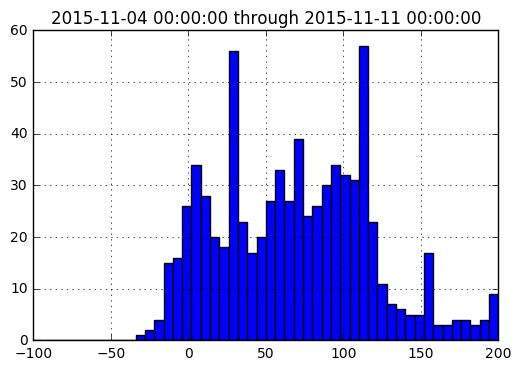

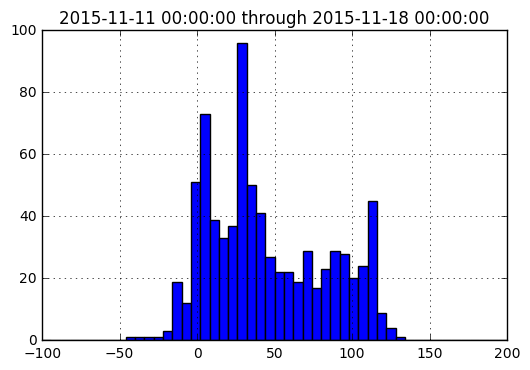

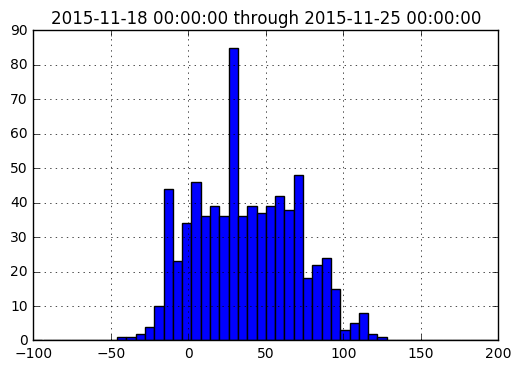

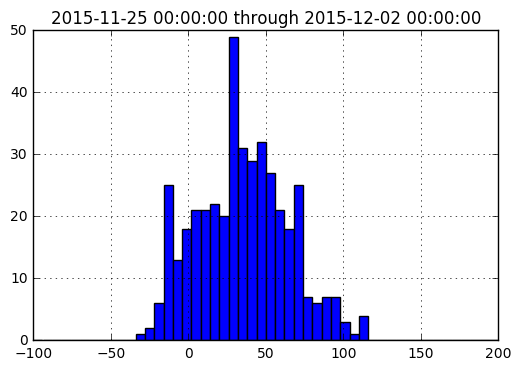

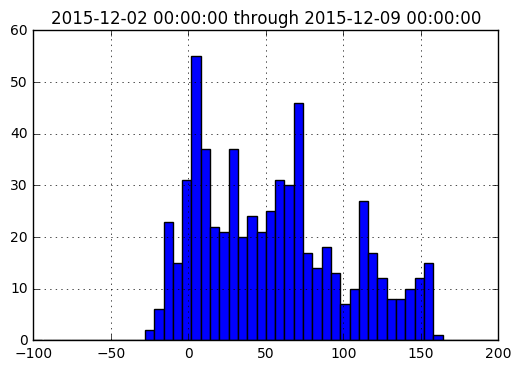

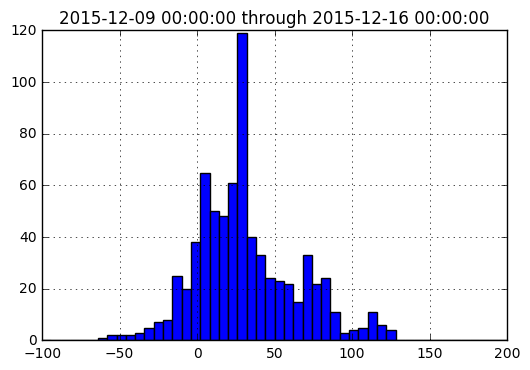

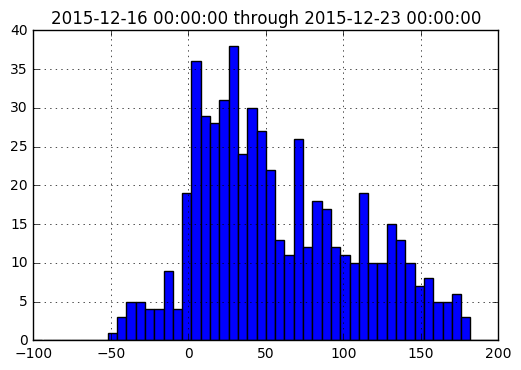

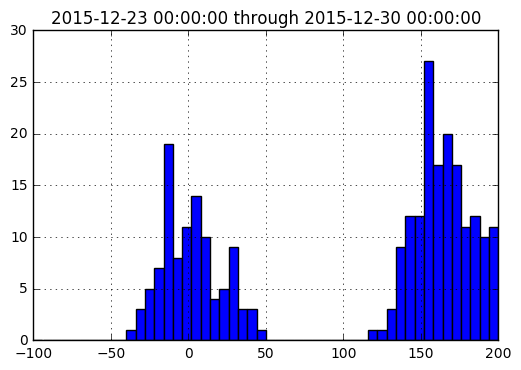

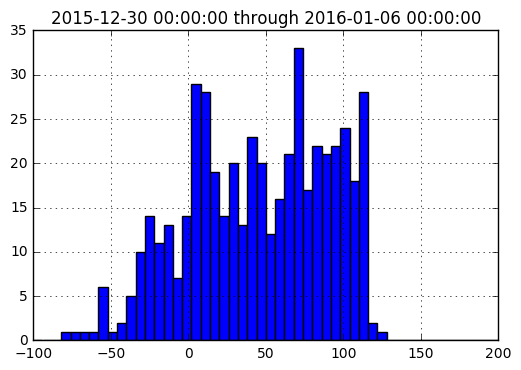

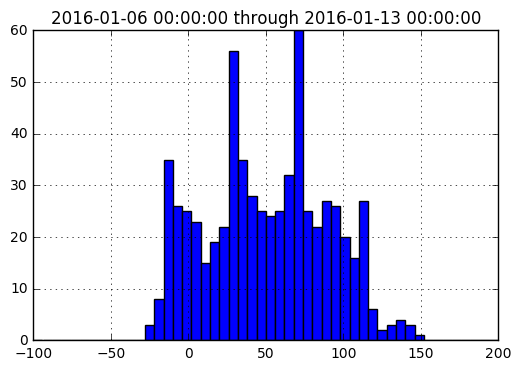

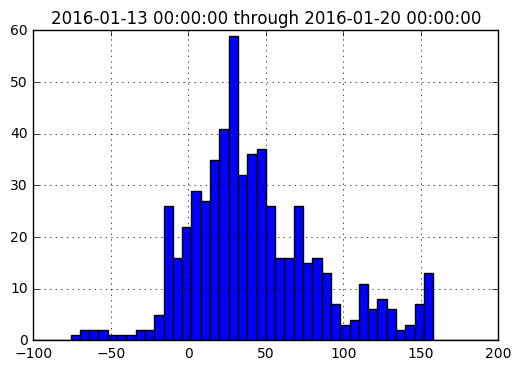

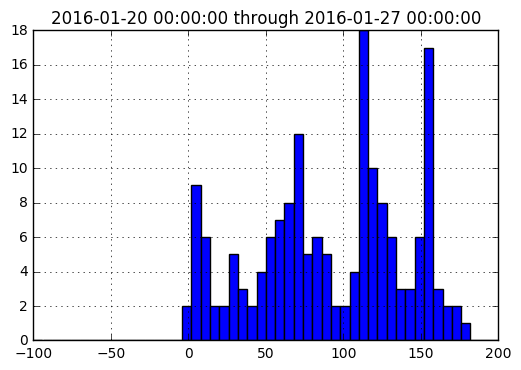

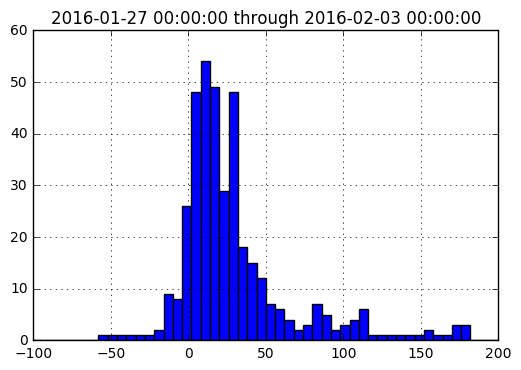

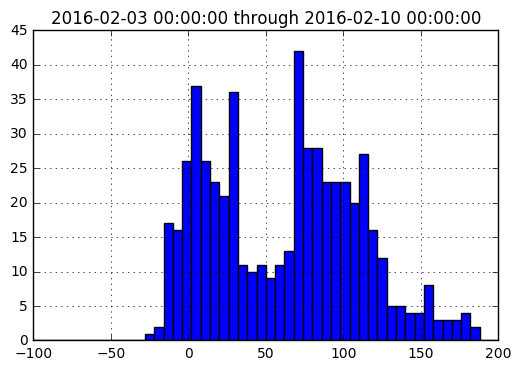

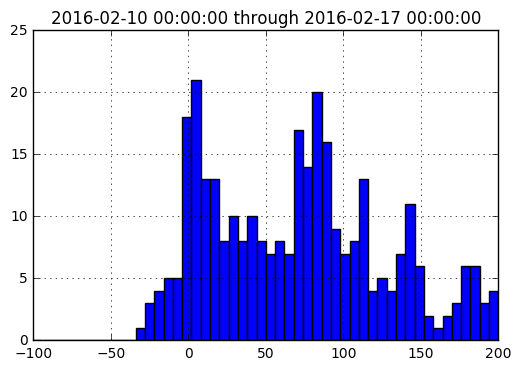

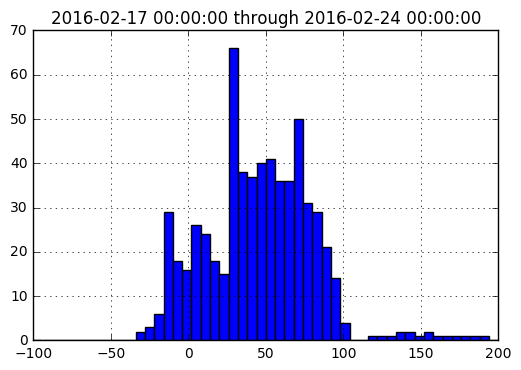

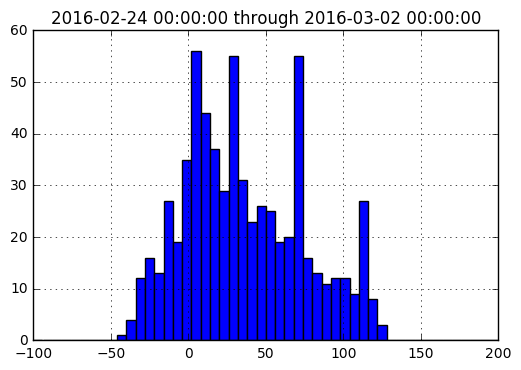

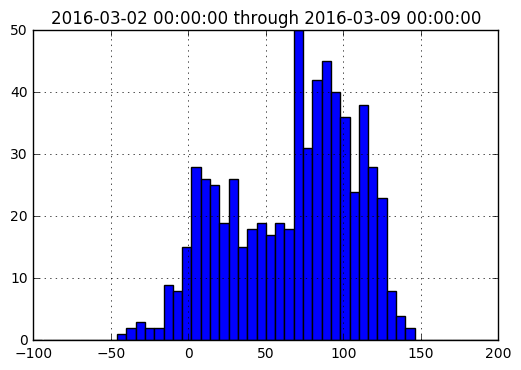

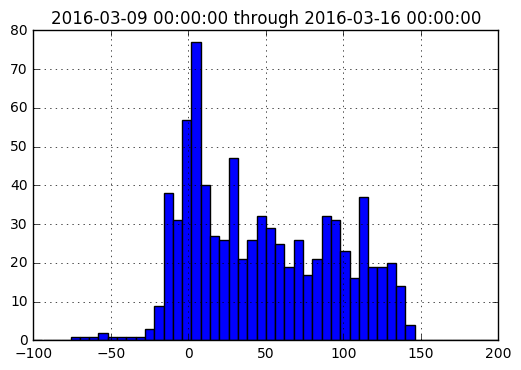

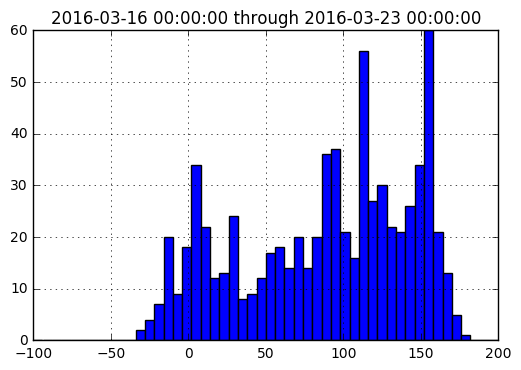

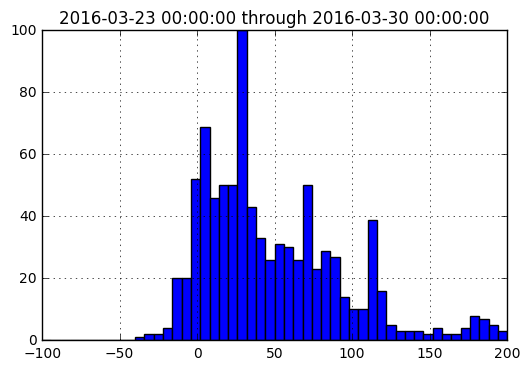

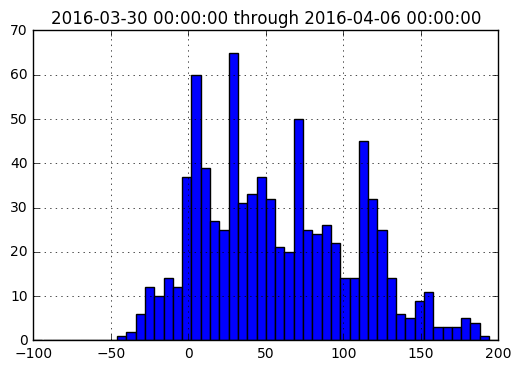

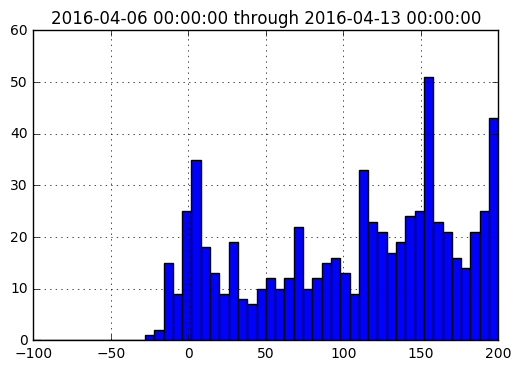

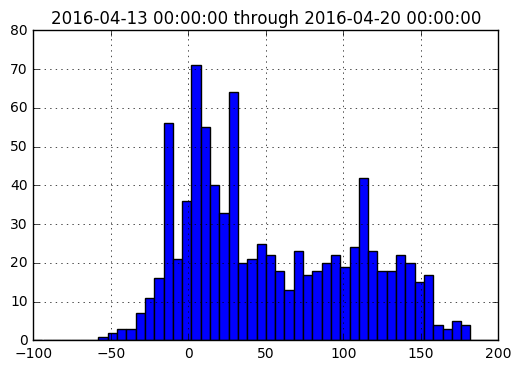

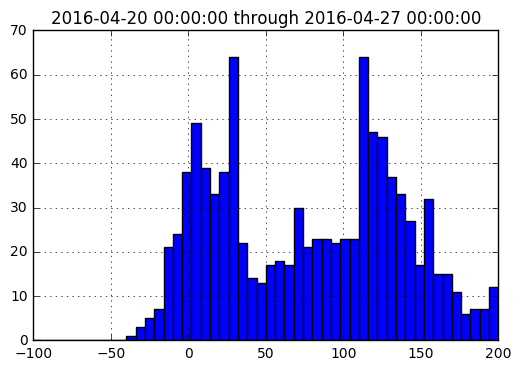

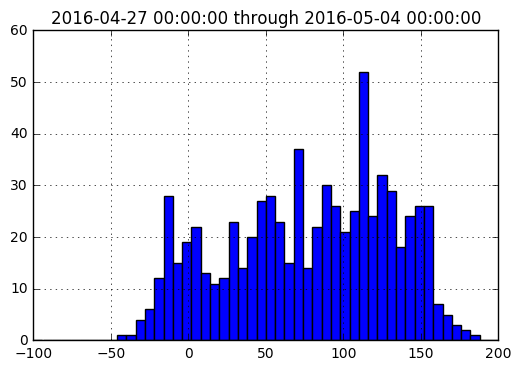

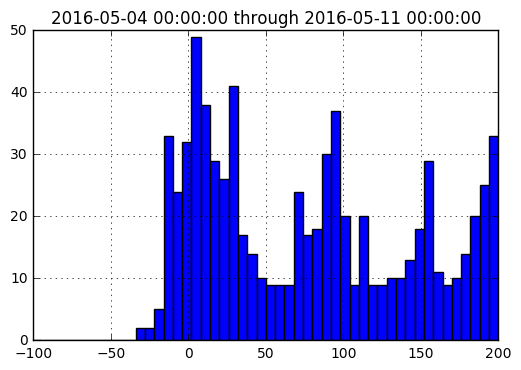

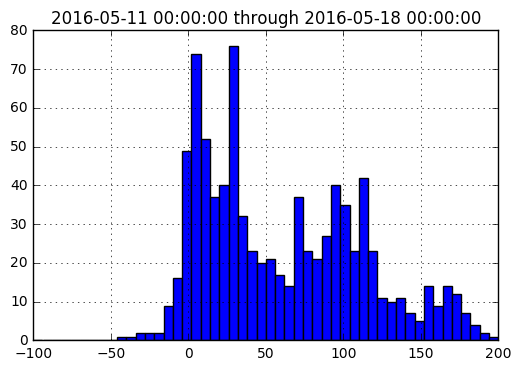

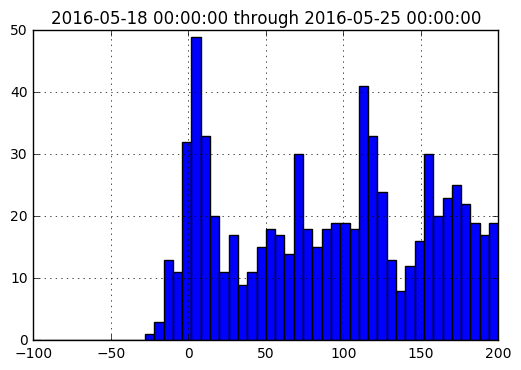

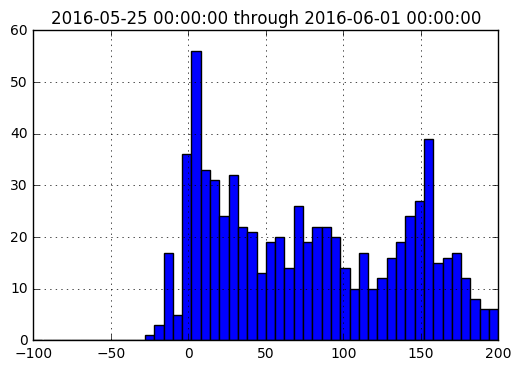

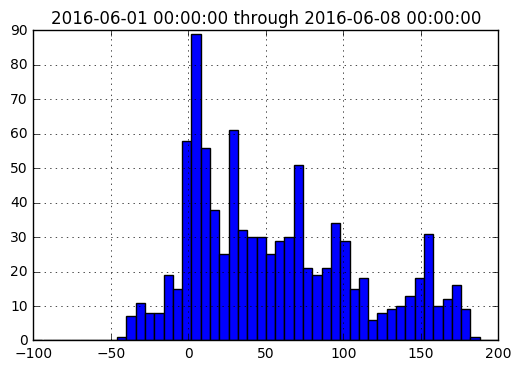

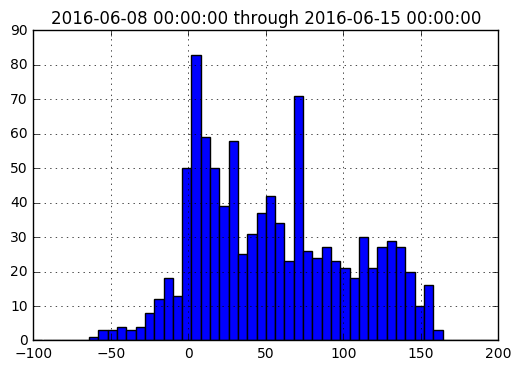

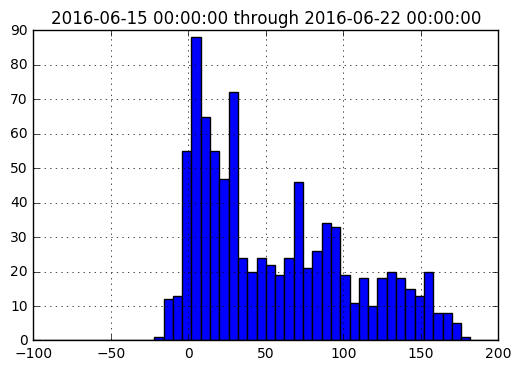

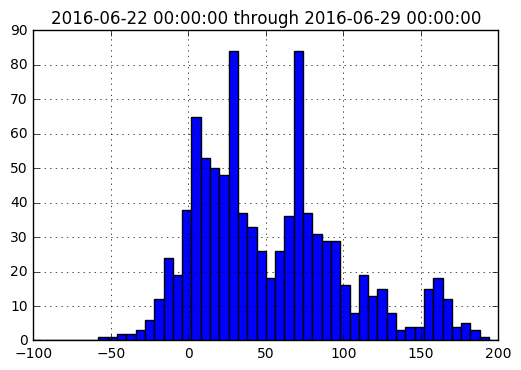

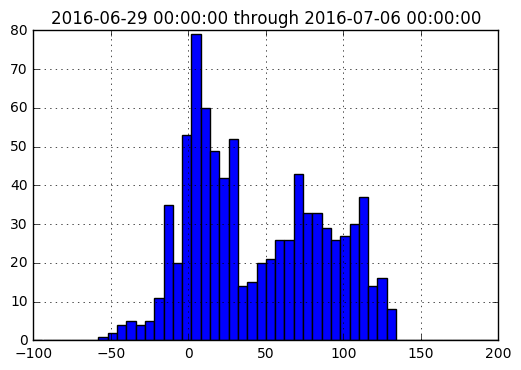

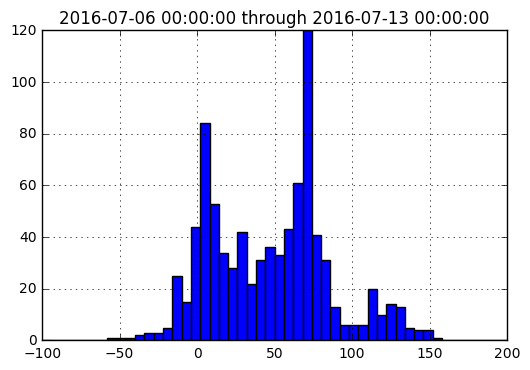

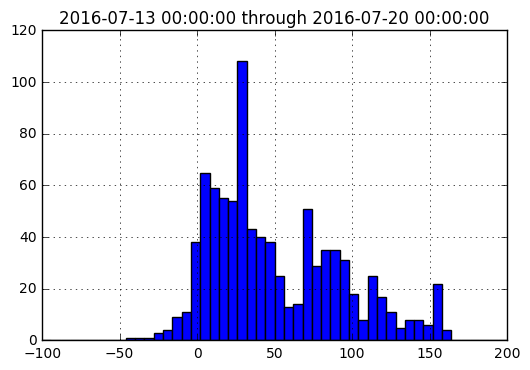

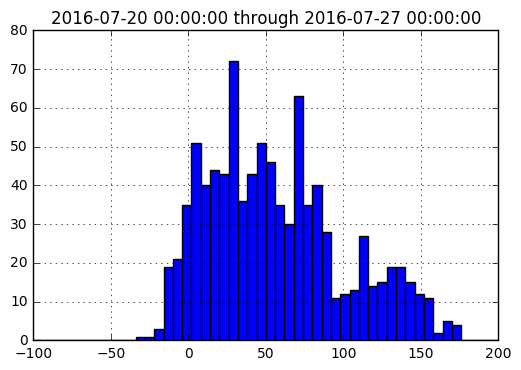

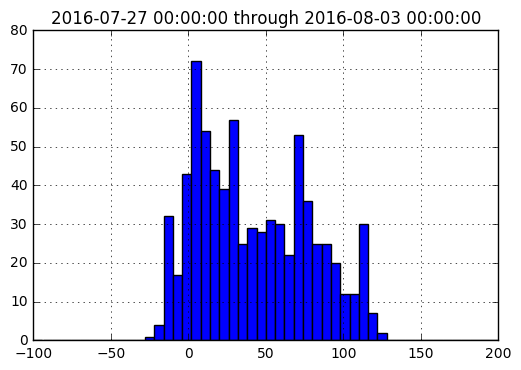

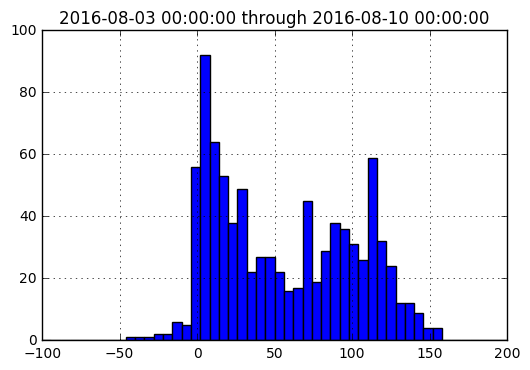

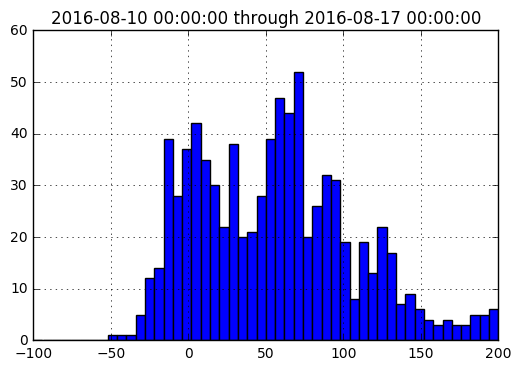

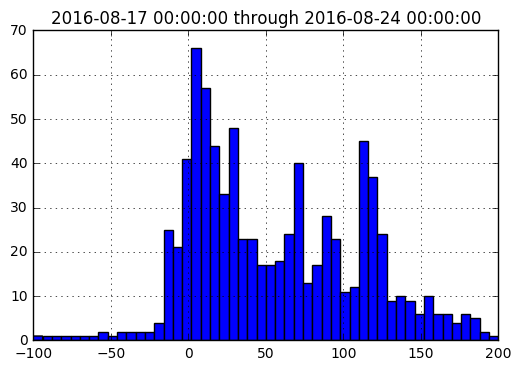

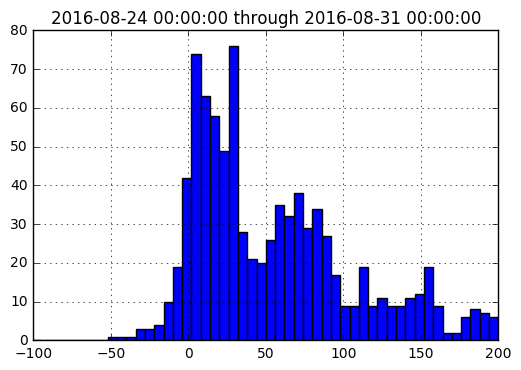

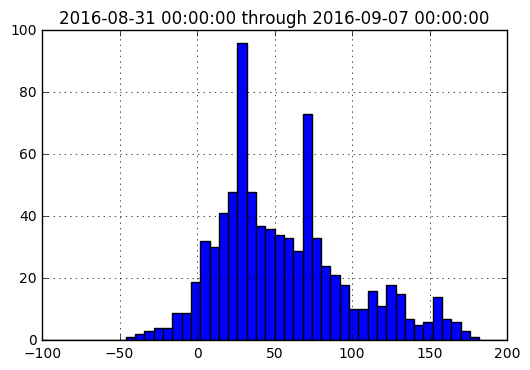

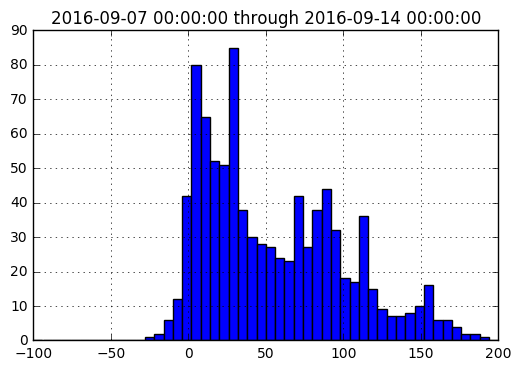

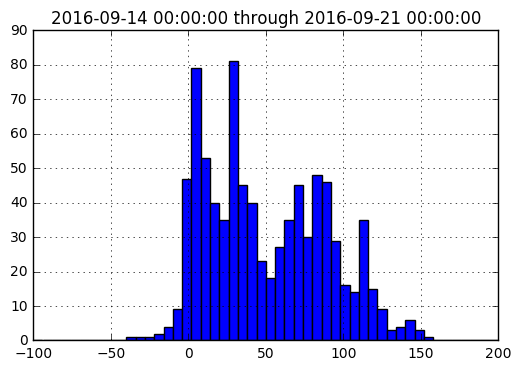

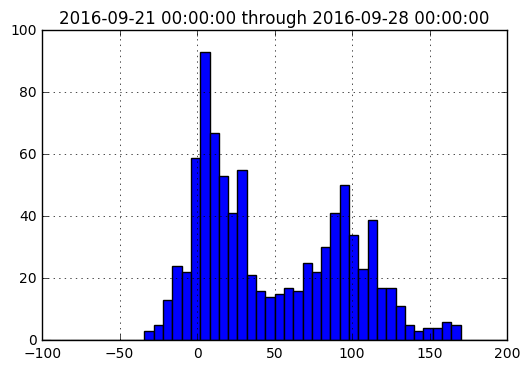

In [324]:
# Look at distributions each week
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-07-08 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_week = datetime.timedelta(days=7)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_week
    end += add_week

In [ ]:
# Look at distributions each day
start = pd.to_datetime('2015-07-01 00:00:00')
end = pd.to_datetime('2015-07-02 00:00:00')
stop = pd.to_datetime('2016-10-01 00:00:00')
add_day = datetime.timedelta(days=1)

while end <= stop:
    pd.DataFrame.hist(discrete_bike_data_31116[((discrete_bike_data_31116['Date'] >= start) & 
                                                (discrete_bike_data_31116['Date'] <= end))], 
                      column='Count_Percent_Capacity', 
                      bins=50, range=(-100,200))
    pl.title(str(start) + ' through ' + str(end))
    start += add_day
    end += add_day